In [1]:
import backtester272 as bt
import pandas as pd
import numpy as np

# Load data

In [2]:
def load_data(name):
    data = pd.read_csv(f'data/{name}.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()
    return data


#benchmark = load_data('benchmark')
weights = load_data('weights')  
sectors = load_data('sectors')


In [3]:
wip = bt.Backtester(sectors, benchmark_weights=weights)

In [10]:
start_date = sectors.index[0].strftime('%Y-%m-%d')
end_date = sectors.index[-1].strftime('%Y-%m-%d')

global_params = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 6,
    'window': 30 * 6,
    'freq_tactical': 30,
    'window_tactical': 30 * 3,
    'freq_macro': 30 * 3,
    'aum': 100,
    'transaction_cost': 0
}

stategy_constraints = {
    'max_weight': 0.35,
    'min_weight': 0.05,
    'risk_free_rate': 0.02,
    'total_exposure': 1.0,
    'max_turnover': 1.5,
    'max_tracking_error': 0.07,
    'lmd_ridge':0
}

tactical_constraints = {
    'delta': 30,
    'nb_fractile':3,
    'alpha': 0.3
}

macro_constraints = {
    'alpha': 0.01,
    'window_size': 30 * 12,
    'threshold': 0,
}

MSM = wip.run(**global_params, strategy=bt.MaxSharpeStrategy(**stategy_constraints), macro=bt.MacroTactical(**macro_constraints), tactical=bt.RankMomentumTactical(**tactical_constraints))

/Users/julesmourgues/Documents/Cours/Master Dauphine/Cross Asset Solutions/Cross-Assets-Solutions/framework/backtester272/DataMacro.py:35: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.yield_10Y = pd.read_csv(yield_10Y_path, index_col=0, parse_dates=True).sort_index().astype(float).pct_change()[1:]
/Users/julesmourgues/Documents/Cours/Master Dauphine/Cross Asset Solutions/Cross-Assets-Solutions/framework/backtester272/MacroStrat.py:62: RuntimeWarning: invalid value encountered in scalar subtract
  zscore = (series.iloc[-1] - mean) / std_dev
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: R

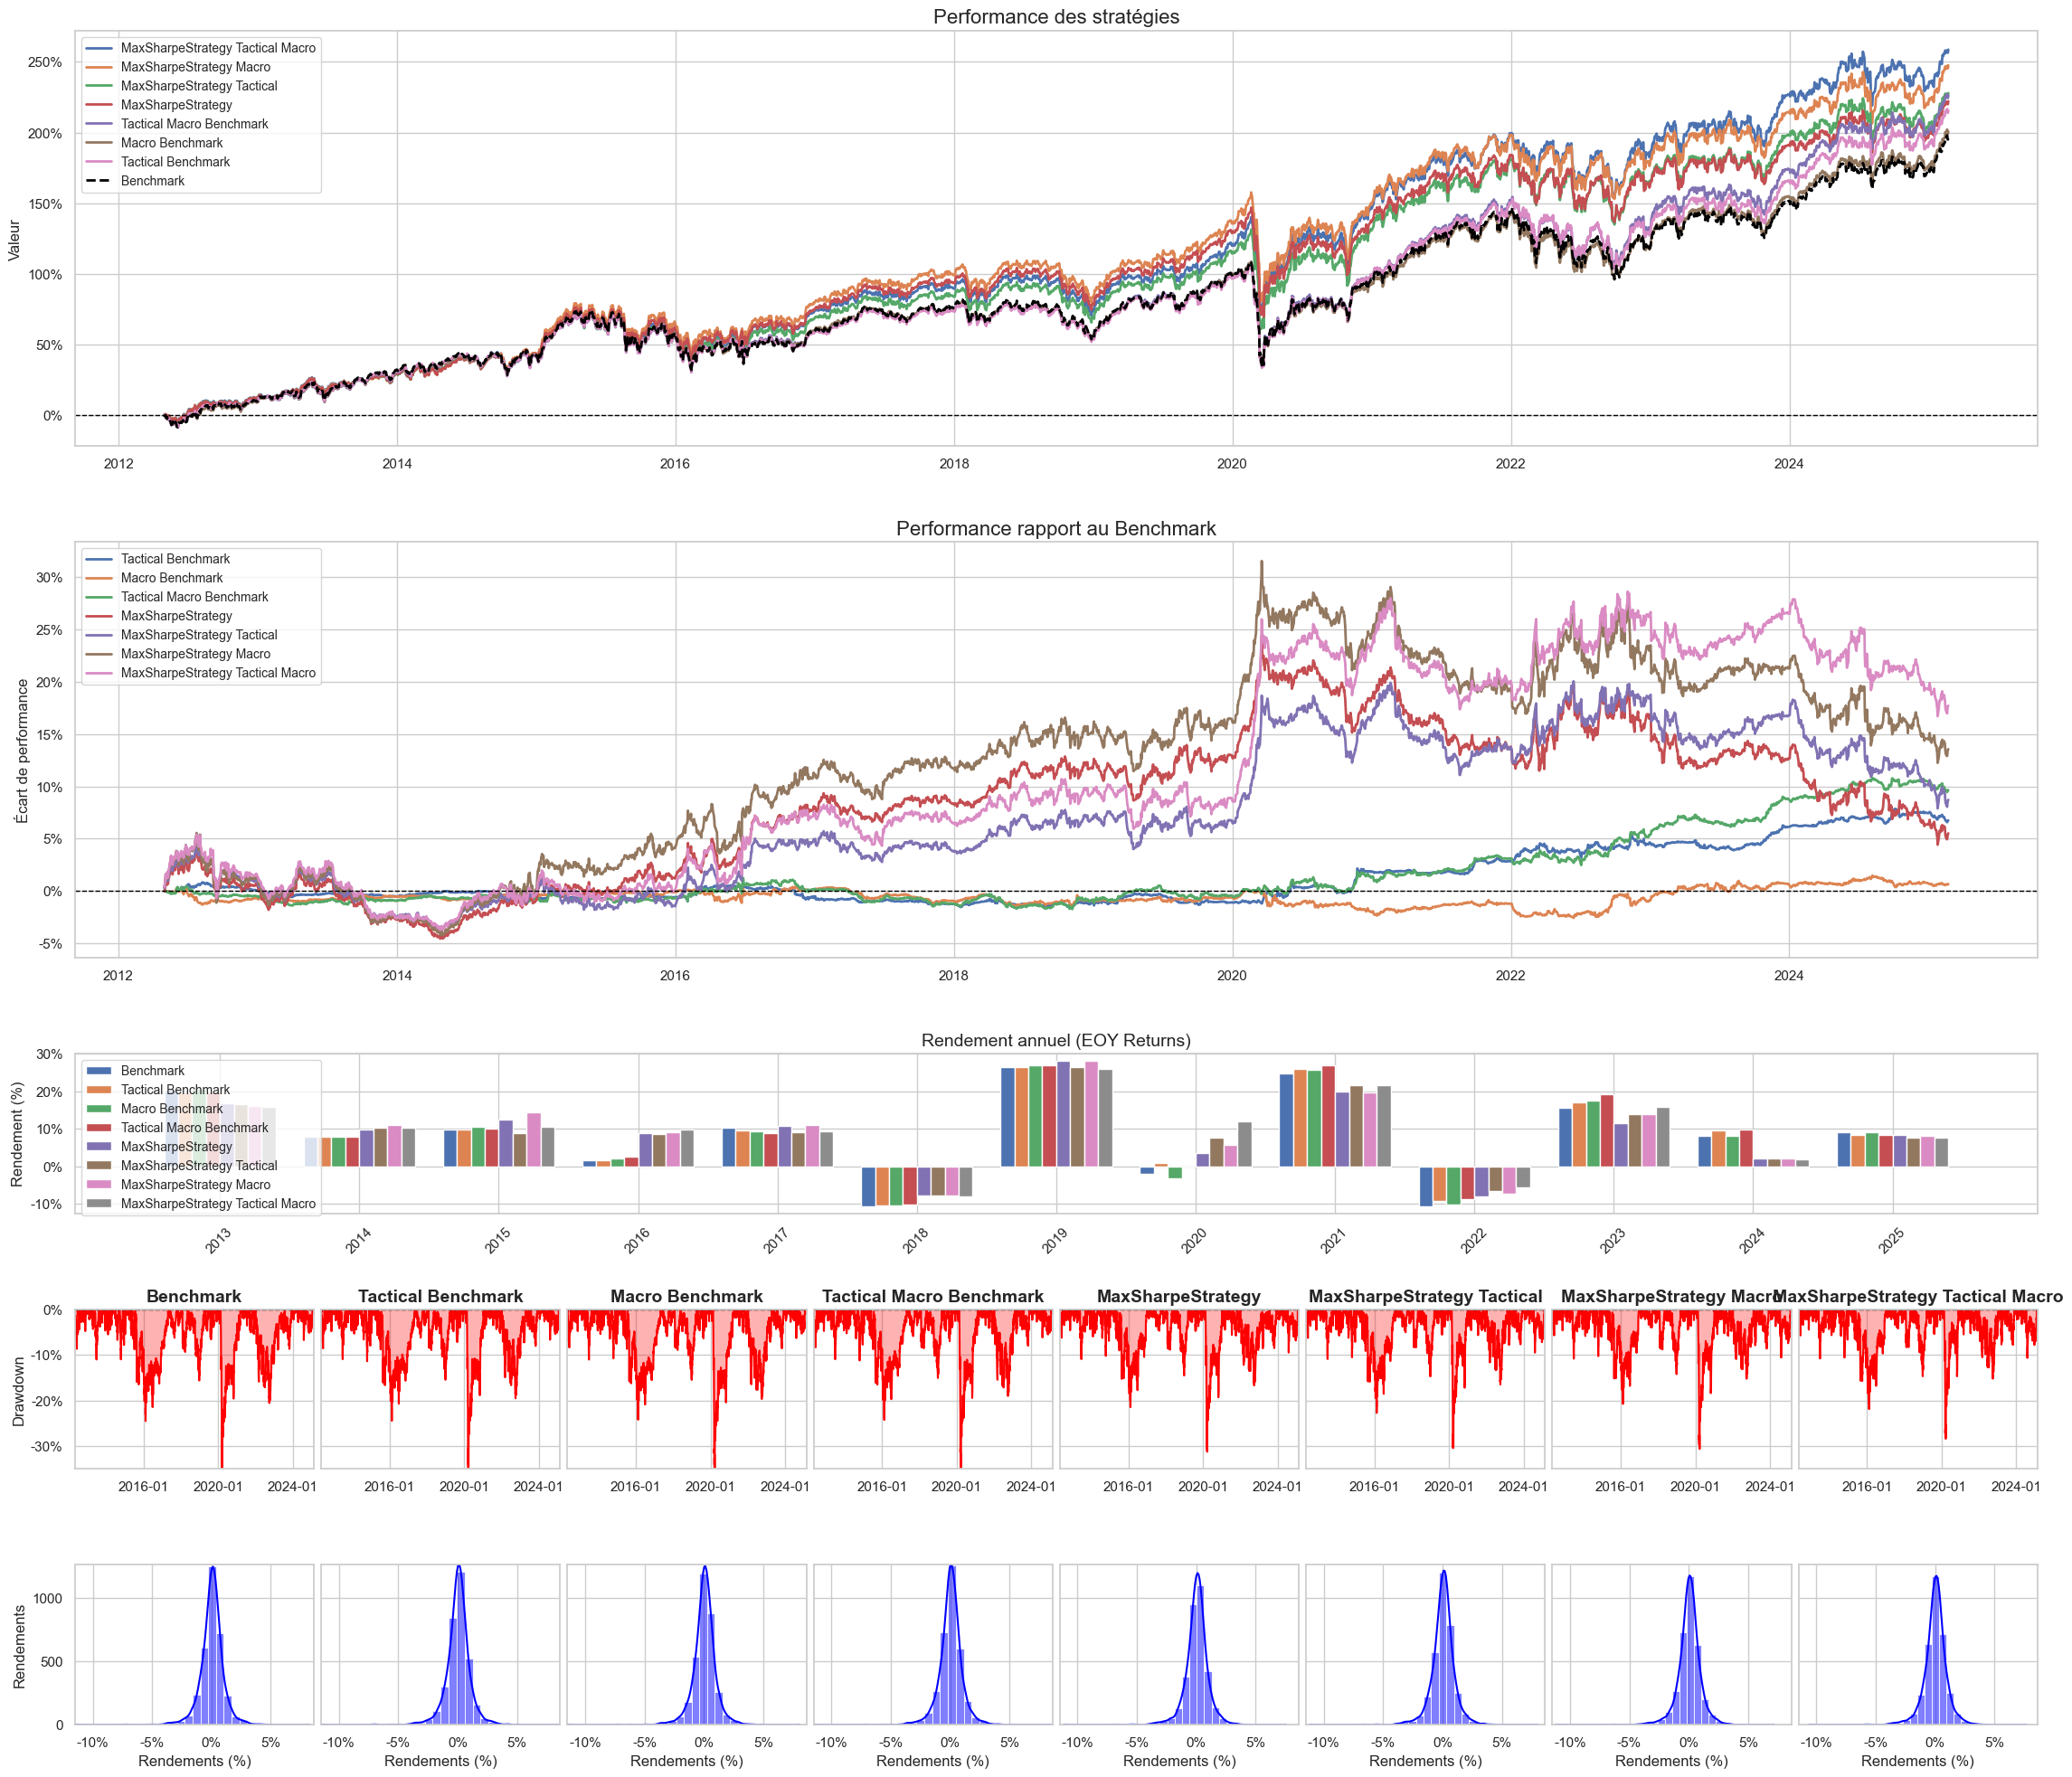

|                              | Benchmark   | Tactical Benchmark   | Macro Benchmark   | Tactical Macro Benchmark   | MaxSharpeStrategy   | MaxSharpeStrategy Tactical   | MaxSharpeStrategy Macro   | MaxSharpeStrategy Tactical Macro   |
|:-----------------------------|:------------|:---------------------|:------------------|:---------------------------|:--------------------|:-----------------------------|:--------------------------|:-----------------------------------|
| Performance                  | 196.68%     | 215.68%              | 200.69%           | 226.12%                    | 222.16%             | 227.99%                      | 222.16%                   | 258.76%                            |
| CAGR                         | 8.68%       | 9.20%                | 8.79%             | 9.47%                      | 9.37%               | 9.52%                        | 9.37%                     | 10.27%                             |
| Volatility                   | 15.43%      | 15.62

,Performance,CAGR,Volatility,Max Drawdown,Sharpe Ratio,Hit Ratio,Average Win,Average Loss,Tracking Error
Benchmark,196.68%,8.68%,15.43%,-34.97%,0.62,1.74,3.65%,-3.49%,0.00%
Tactical Benchmark,215.68%,9.20%,15.62%,-35.05%,0.64,1.53,3.06%,-2.87%,1.07%
Macro Benchmark,200.69%,8.79%,15.10%,-35.06%,0.63,1.60,3.52%,-3.17%,1.14%
Tactical Macro Benchmark,226.12%,9.47%,15.35%,-35.04%,0.67,1.64,2.97%,-2.93%,1.33%
MaxSharpeStrategy,222.16%,9.37%,14.90%,-31.27%,0.68,3.25,12.37%,-7.11%,4.28%
MaxSharpeStrategy Tactical,227.99%,9.52%,15.09%,-30.47%,0.68,1.73,4.05%,-3.60%,3.90%
MaxSharpeStrategy Macro,222.16%,9.37%,14.90%,-31.27%,0.68,2.78,7.35%,-5.78%,4.39%
MaxSharpeStrategy Tactical Macro,258.76%,10.27%,14.83%,-28.38%,0.73,1.95,3.86%,-3.64%,4.77%


In [11]:
MSM.visualize()
MSM.gather_metrics(highlight_extremes=True)